<a href="https://colab.research.google.com/github/rafflds/bons_maus_pagadores_emprestimo/blob/main/Dados_emprestimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=red>Imports de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

sns.set_style('darkgrid')
plt.style.use('ggplot')

## <font color=green>Análise Exploratória

In [2]:
# Leitura da base de dados, tradução das colunas. Colando a colunas como cabeçario

base = pd.read_csv('credit_data.csv', encoding='utf-8',
                   names=['id','renda', 'idade', 'divida', 'resposta'],header=0)

# Retirar a coluna "id"

base = base[['renda', 'idade', 'divida','resposta']]

# Visualizar os métricas estatísticas dos dados

base.describe().T


,count,mean,std,min,25%,50%,75%,max
renda,2000.0,45331.600018,14326.327119,20014.48947,32796.459717,45789.117313,57791.281668,69995.685578
idade,1997.0,40.807559,13.624469,-52.42328,28.990415,41.317159,52.587040,63.971796
divida,2000.0,4444.369695,3045.410024,1.37763,1939.708847,3974.719419,6432.410625,13766.051239
resposta,2000.0,0.141500,0.348624,0.00000,0.000000,0.000000,0.000000,1.000000


**Informações gerais sobre a base de dados**

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   renda     2000 non-null   float64
 1   idade     1997 non-null   float64
 2   divida    2000 non-null   float64
 3   resposta  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


**Quantidade de registros por label**

In [4]:
base.resposta.value_counts()

0    1717
1     283
Name: resposta, dtype: int64

**Quantidade de valores duplicados**

In [5]:
duplicated = base.duplicated().sum()
print(f'Quantos valores duplicados: {duplicated}')

Quantos valores duplicados: 0


## <font color=blue>Pré-Processamento Dados

In [6]:
# Visualizar os registros com idade negativa

base.query('idade < 0')

,renda,idade,divida,resposta
15,50501.726689,-28.218361,3977.287432,0
21,32197.620701,-52.423280,4244.057136,0
26,63287.038908,-36.496976,9595.286289,0


In [7]:
# Substituir os valores negativos, existente na coluna idade, por valores positivos

def substituir_negativo(valor):
  if valor < 0:
    return -valor
  else:
    return valor

# Aplicar a função na coluna idade

base.idade = base.idade.apply(substituir_negativo)
base.query('idade < 0')


,renda,idade,divida,resposta


In [8]:
'''
Criar uma variável com média de idade
Aplicar a média dos dados nos valores faltantes
Visualizar a existência dos valores faltantes
'''
mean = base.idade.mean()
base.fillna(mean, inplace=True)

# Visualizar as devidas correções

display('Valores faltantes: ',base.isnull().sum())

'Valores faltantes: '

renda       0
idade       0
divida      0
resposta    0
dtype: int64

In [9]:
# Idade mínima passou a ser 18 anos. Antes -52 anos.

base.idade.min().round()

18.0

## Dashboards

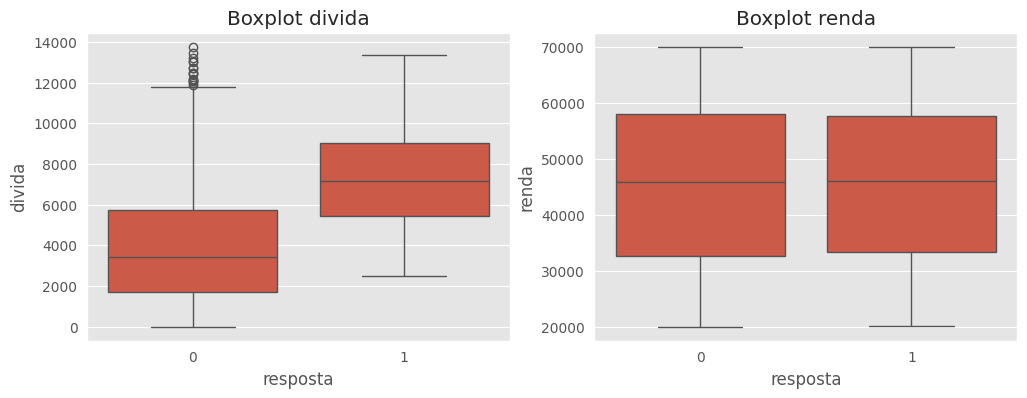

In [10]:
# Tamanho

fig, ax = plt.subplots(1, 2,   figsize=(12,4))

# 1° boxplot

ax[0].set_title('Boxplot divida')
sns.boxplot(x='resposta', y='divida', data=base, ax=ax[0])

# 2° boxplot

ax[1].set_title('Boxplot renda')
sns.boxplot(x='resposta', y='renda', data=base, ax=ax[1])

# visualização

plt.show()


Text(0.5, 1.0, 'Boxplot sem outliers')

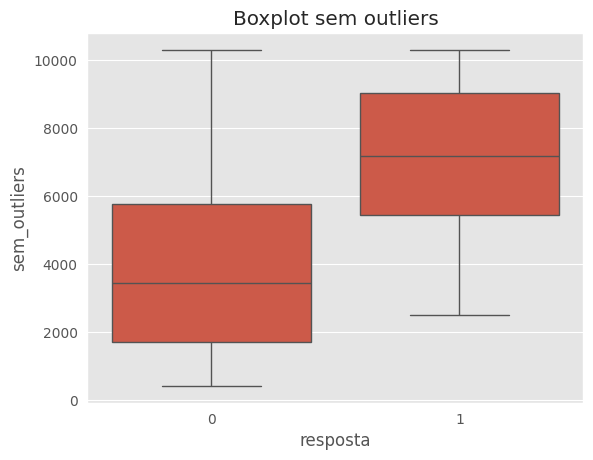

In [11]:
'''Substituir pelos valores no limite superior e inferior do conjunto de dados.
Isso permite suavizar os efeitos dos outliers sem removê-los completamente.'''

base['sem_outliers'] = winsorize(base['divida'], limits=[0.05, 0.05])

# Visualizar o gráfico

sns.boxplot(x='resposta', y='sem_outliers', data=base)
plt.title('Boxplot sem outliers')

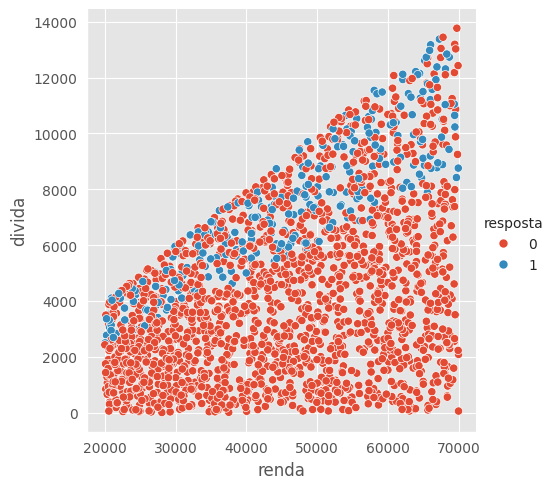

In [13]:
# Relação entre duas variáveis ou conjuntos de dados
# Quanto maior a renda, maior a dívida

sns.relplot(x='renda', y='divida', data=base,hue="resposta")


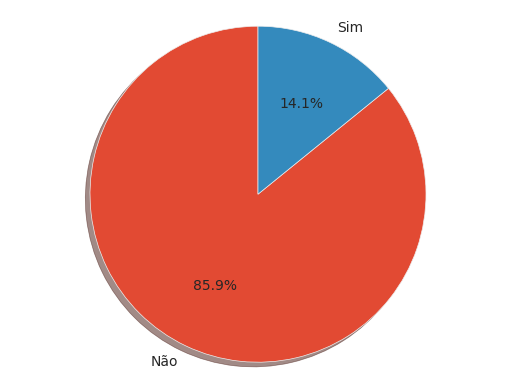

In [14]:
# Distribuição da variável label

fig1, ax1 = plt.subplots()
ax1.pie(base.resposta.value_counts(), labels=['Não', 'Sim'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
